In [53]:
# Initialize Otter
import otter
grader = otter.Notebook("project2.ipynb")

<table style="width: 100%;">
<tr style="background-color: transparent;">
<td width="100px"><img src="https://cs104williams.github.io/assets/cs104-logo.png" width="90px" style="text-align: center"/></td>
<td>
  <p style="margin-bottom: 0px; text-align: left; font-size: 18pt;"><strong>CSCI 104: Data Science and Computing for All</strong><br>
                Williams College<br>
                Fall 2023</p>
</td>
</tr>


# Final Project

Please see the [Final Project Description](https://www.cs.williams.edu/~cs104/docs/project2.html) for instructions and deadlines.

All work should appear in this notebook.  You may add as many additional cells as you like to each part.  Just click the `+` sign in this tab's toolbar to insert a new cell.  Then select "Markdown" from the toolbar's popup menu if you want the new cell to be for text, or "Code" if you want it to be for Python code.  Markdown cells can include basic formatting and are easily identified because they do not have the brackets `[ ]` in the left margin.  Click on any of our formatted text cells to see how to create lists, bold text, etc., or have a look [here](https://www.markdownguide.org/basic-syntax).


In [54]:
# Run this cell to set up the notebook.
# These lines import the numpy, datascience, and cs104 libraries.

import numpy as np
from datascience import *
from cs104 import *
%matplotlib inline

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 0. Source of data


Please tell us where you found the dataset(s) and what they include in general terms.
- Include URLs for where the data was downloaded. 
- What are the sources for the data? Are these reputable sources? 
- Can you find who (the names of humans) collected or cleaned the dataset before you downloaded it?

If you are having trouble getting started, here are a few places to look for data:
* [Google's Dataset Search](https://datasetsearch.research.google.com/)
* [Five-Thirty Eight](https://data.fivethirtyeight.com/)
* [Data Is Plural](https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0)
* [Our World in Data](https://ourworldindata.org/)

Our dataset is from Kaggle, the URL is https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset. The source for the data is https://barttorvik.com/trank.php#. I believe this is a reputable source, used by various media companies as a reference. 
The person who collected and cleaned the dataset is Andrew Sundberg.

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 1. Quantitative questions


Pose at least two quantitative questions about the dataset. 

**Quantiative question 1:**

What is the highest win percentage among all Division 1 basketball teams in 2022, and is there a stronger correlation between offensive efficency and win percentage or defensive efficiency and win percentage? (Is defense or offense more important?)

**Quantitative question 2:**

Can we combine offensive efficency and defensive efficiency to get a better predictor of win percentage?

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 2. Data: Loading and Cleaning

Be sure to upload your csv files to the project on our server, and to clean your data if there are any missing values or other problems.  

We highly encourage you return to Lab 6 and revist how you cleaned data with `tbl.take_clean()`, `tbl.take_messy()`, and `tbl.replace()`. 

In [55]:
college_basketball = Table.read_table('cbb.csv')
college_basketball.show(3)
college_basketball = college_basketball.select("TEAM","CONF", "G", "W", "ADJOE", "ADJDE", "YEAR").take_clean("TEAM", str, "CONF", str, "G", int, "W", int, "ADJOE", float, "ADJDE", float, "YEAR", int)

TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1,2016
Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1,2015
Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14,19.5,25.5,24.9,30.7,30,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3,2018


TEAM: The Division I college basketball school

CONF: The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)

G: Number of games played

W: Number of games won

ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)

ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

BARTHAG: Power Rating (Chance of beating an average Division I team)

EFG_O: Effective Field Goal Percentage Shot

EFG_D: Effective Field Goal Percentage Allowed

TOR: Turnover Percentage Allowed (Turnover Rate)

TORD: Turnover Percentage Committed (Steal Rate)

ORB: Offensive Rebound Rate

DRB: Offensive Rebound Rate Allowed

FTR : Free Throw Rate (How often the given team shoots Free Throws)

FTRD: Free Throw Rate Allowed

2P_O: Two-Point Shooting Percentage

2P_D: Two-Point Shooting Percentage Allowed

3P_O: Three-Point Shooting Percentage

3P_D: Three-Point Shooting Percentage Allowed

ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)

WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)

POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)

SEED: Seed in the NCAA March Madness Tournament

YEAR: Season

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 3. Descriptive statistics


Use code and text to provide at least three descriptions of the dataset (e.g., number of rows, mean of one of the columns).

The best win percentage is 100%, with Murray St. winning all of its games in 2022.

In [56]:
cbb_22 = college_basketball.where('YEAR', are.equal_to(2022))
win_percentage_22 = cbb_22.column('W') / cbb_22.column('G')
win_percentage_22
cbb_22 = cbb_22.with_column('Win Percentage', win_percentage_22).sort('Win Percentage', descending = True)
cbb_22.show(5)
best_win_percentage = max(cbb_22.column('Win Percentage'))
best_win_percentage

TEAM,CONF,G,W,ADJOE,ADJDE,YEAR,Win Percentage
Murray St.,OVC,31,31,110,96.2,2022,1
South Dakota St.,Sum,33,30,114.1,103.5,2022,0.909091
Longwood,BSth,29,26,105.7,103.7,2022,0.896552
Arizona,P12,37,33,118,93.7,2022,0.891892
Gonzaga,WCC,32,28,120.3,89.9,2022,0.875


1.0

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


There are 3523 rows in the dataset.

In [57]:
number_of_rows = college_basketball.num_rows
number_of_rows

3523

The average offensive efficiency among all division 1 teams is 103.15. This means per 100 possessions, the average college basketball team would score 103 points.

In [58]:
avg_offensive_efficiency = np.mean(college_basketball.column("ADJOE"))
avg_offensive_efficiency

103.15131989781436

## 4. Data wrangling


Use at least two Table methods (e.g., `sort`, `where`, `take`, `apply`, `pivot`, `join`, `group`) to do something meaningful with the data. Describes (in full English sentences) what those Table methods are doing.

In [59]:
def win_percent_tables(i):
    cbb_i = college_basketball.where('YEAR', are.equal_to(i))
    win_percentage_i = cbb_i.column('W') / cbb_i.column('G')

    cbb_i = cbb_i.with_column('Win Percentage', win_percentage_i).sort('Win Percentage', descending = True)
    return cbb_i

This function takes a year as input and returns a table sorted by win percentage for that year.

In [60]:
win_percent_tables(2013)

TEAM,CONF,G,W,ADJOE,ADJDE,YEAR,Win Percentage
Gonzaga,WCC,34,31,118.9,90.2,2013,0.911765
Louisville,BE,40,35,115.9,84.5,2013,0.875
Memphis,CUSA,36,31,106.1,90.2,2013,0.861111
Kansas,B12,37,31,111.6,86.2,2013,0.837838
Duke,ACC,36,30,118.4,91.5,2013,0.833333
New Mexico,MWC,35,29,107,91.1,2013,0.828571
Middle Tennessee,SB,34,28,105.1,91,2013,0.823529
Stephen F. Austin,Slnd,28,23,98,88.7,2013,0.821429
Bucknell,Pat,33,27,104.7,93.1,2013,0.818182
Indiana,B10,36,29,121,89.7,2013,0.805556


In [61]:
conferences = college_basketball.group('CONF', np.mean).select('CONF', 'ADJOE mean', 'ADJDE mean')
conferences.show(5)

CONF,ADJOE mean,ADJDE mean
A10,105.135,100.177
ACC,111.119,97.0762
AE,98.3957,105.984
ASun,100.675,107.458
Amer,106.338,98.773


This group method takes the conferences and gives a table named conferences along with the conferences' adjusted offensive and defensive efficiency.

In [62]:
power_5 = college_basketball.where('CONF', are.contained_in(make_array('ACC', 'B10', 'B12', 'SEC', 'P12')))
power_5_offense = power_5.group('CONF', np.mean).select('CONF', 'ADJOE mean', 'ADJDE mean')
power_5_offense.show()

CONF,ADJOE mean,ADJDE mean
ACC,111.119,97.0762
B10,111.104,95.8809
B12,111.787,95.048
P12,108.749,98.0633
SEC,109.342,96.5471


This section of code focuses on just the power 5 conferences, also comparing offensive and defensive efficiencies.

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 5. Visualizations


Create at least two visualizations of the dataset (e.g., a scatter and line plot, or two histograms). Describs (using full English sentences) any interesting findings from the visualizations.

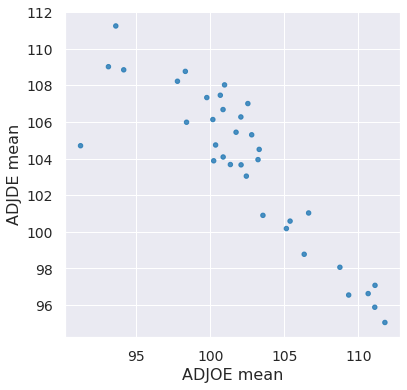

In [63]:
conferences.scatter('ADJOE mean', 'ADJDE mean')

Conferences with a better average offense tend to have a better average defense.

In [64]:
michigan = college_basketball.where('TEAM', are.equal_to('Michigan'))

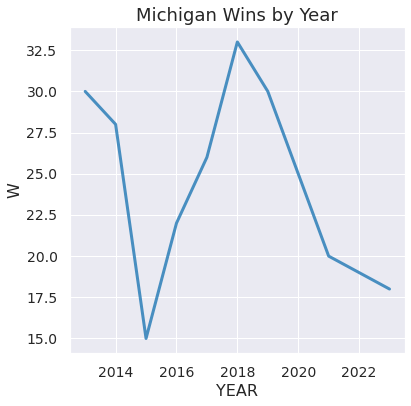

In [65]:
michigan.plot('YEAR', 'W').set_title('Michigan Wins by Year')

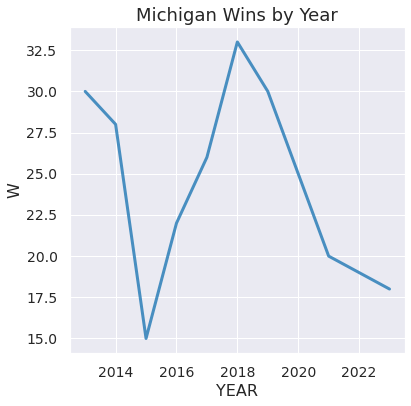

In [66]:
def teams_wins(team_name):
    plot = college_basketball.where('TEAM', team_name).select('YEAR','W').plot('YEAR').set_title(team_name + ' ' + 'Wins by Year')
    
teams_wins('Michigan')
    

In [67]:
all_teams = np.unique(college_basketball.column('TEAM'))

interact(teams_wins,team_name = Choice(all_teams))

interactive(children=(Dropdown(description='team_name', options=('Abilene Christian', 'Air Force', 'Akron', 'A…

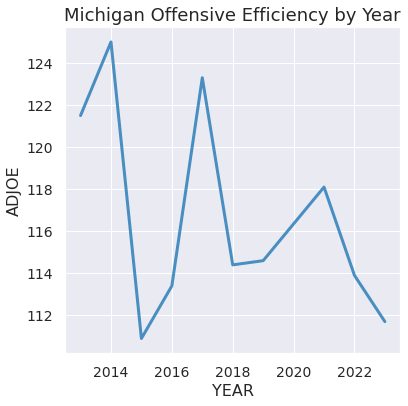

In [68]:
def teams_offensive(team_name):
    plot = college_basketball.where('TEAM', team_name).select('YEAR','ADJOE').plot('YEAR').set_title(team_name + ' ' + 'Offensive Efficiency by Year')
    
teams_offensive('Michigan')
    

In [69]:
interact(teams_offensive,team_name = Choice(all_teams))

interactive(children=(Dropdown(description='team_name', options=('Abilene Christian', 'Air Force', 'Akron', 'A…

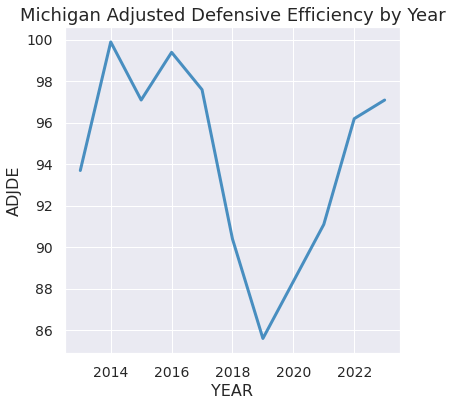

In [70]:
michigan.plot('YEAR', 'ADJDE').set_title('Michigan Adjusted Defensive Efficiency by Year')

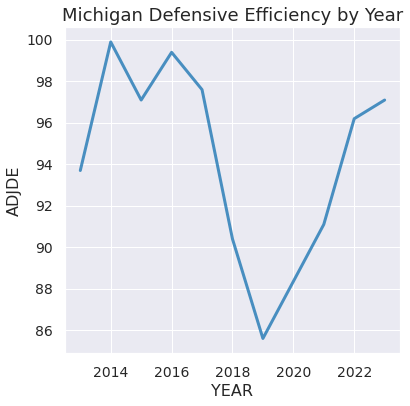

In [71]:
def teams_defensive(team_name):
    plot = college_basketball.where('TEAM', team_name).select('YEAR','ADJDE').plot('YEAR').set_title(team_name + ' ' + 'Defensive Efficiency by Year')
    
teams_defensive('Michigan')

In [72]:
interact(teams_defensive,team_name = Choice(all_teams))

interactive(children=(Dropdown(description='team_name', options=('Abilene Christian', 'Air Force', 'Akron', 'A…

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 6. Statistical Inference

Correctly complete at least two statistical inference procedures (e.g., a hypothesis test and a bootstrap confidence interval; or two association). Discuss (in full English sentences) the implications of the statistical inference procedures.

Categories: 
- Hypothesis tests
- Estimation (e.g., confidence intervals via bootstrapping) 
- Association (e.g., correlation or a linear regression line fit from a scatter plot) 

In [73]:
diff_adjoe = college_basketball.column("ADJOE") - np.mean(college_basketball.column("ADJOE"))
college_basketball = college_basketball.with_columns("ADJOE DIFF", diff_adjoe)

In [74]:
diff_adjde = college_basketball.column("ADJDE") - np.mean(college_basketball.column("ADJDE"))
college_basketball = college_basketball.with_columns("ADJDE DIFF", diff_adjde)
cbb_22 = college_basketball.where("YEAR", are.equal_to(2022))
cbb_22 = cbb_22.with_columns("COMBINED", cbb_22.column("ADJOE") - cbb_22.column("ADJDE"))
cbb_22 = cbb_22.with_columns("WIN PERCENTAGES", cbb_22.column("W") / cbb_22.column("G"))
cbb_22

TEAM,CONF,G,W,ADJOE,ADJDE,YEAR,ADJOE DIFF,ADJDE DIFF,COMBINED,WIN PERCENTAGES
Gonzaga,WCC,32,28,120.3,89.9,2022,17.1487,-13.2533,30.4,0.875
Kansas,B12,40,34,119.8,91.3,2022,16.6487,-11.8533,28.5,0.85
Baylor,B12,34,27,117.8,91.3,2022,14.6487,-11.8533,26.5,0.794118
Arizona,P12,37,33,118,93.7,2022,14.8487,-9.45325,24.3,0.891892
Duke,ACC,39,32,122.7,96,2022,19.5487,-7.15325,26.7,0.820513
Villanova,BE,38,30,117.2,93,2022,14.0487,-10.1533,24.2,0.789474
Kentucky,SEC,34,26,119.4,95.4,2022,16.2487,-7.75325,24,0.764706
Auburn,SEC,34,28,111.7,90,2022,8.54868,-13.1533,21.7,0.823529
Texas Tech,B12,37,27,110.5,85.4,2022,7.34868,-17.7533,25.1,0.72973
Tennessee,SEC,35,27,111.3,87.1,2022,8.14868,-16.0533,24.2,0.771429


In [75]:
cbb_22_adjoe = cbb_22.sort("ADJOE", descending = True)
cbb_22_adjoe

TEAM,CONF,G,W,ADJOE,ADJDE,YEAR,ADJOE DIFF,ADJDE DIFF,COMBINED,WIN PERCENTAGES
Duke,ACC,39,32,122.7,96,2022,19.5487,-7.15325,26.7,0.820513
Purdue,B10,37,29,121.6,97.5,2022,18.4487,-5.65325,24.1,0.783784
Iowa,B10,36,26,121.1,97.2,2022,17.9487,-5.95325,23.9,0.722222
Gonzaga,WCC,32,28,120.3,89.9,2022,17.1487,-13.2533,30.4,0.875
Kansas,B12,40,34,119.8,91.3,2022,16.6487,-11.8533,28.5,0.85
Kentucky,SEC,34,26,119.4,95.4,2022,16.2487,-7.75325,24,0.764706
Arizona,P12,37,33,118,93.7,2022,14.8487,-9.45325,24.3,0.891892
Baylor,B12,34,27,117.8,91.3,2022,14.6487,-11.8533,26.5,0.794118
Villanova,BE,38,30,117.2,93,2022,14.0487,-10.1533,24.2,0.789474
Houston,Amer,38,32,116.5,88.5,2022,13.3487,-14.6533,28,0.842105


In [76]:
cbb_22_adjde = cbb_22.sort("ADJDE", descending = True)
cbb_22_adjde

TEAM,CONF,G,W,ADJOE,ADJDE,YEAR,ADJOE DIFF,ADJDE DIFF,COMBINED,WIN PERCENTAGES
Arkansas Pine Bluff,SWAC,29,7,97.6,119.8,2022,-5.55132,16.6467,-22.2,0.241379
Incarnate Word,Slnd,29,7,94.4,116.7,2022,-8.75132,13.5467,-22.3,0.241379
St. Thomas,Sum,27,10,105.9,116.6,2022,2.74868,13.4467,-10.7,0.37037
Nebraska Omaha,Sum,29,5,96.5,116.5,2022,-6.65132,13.3467,-20,0.172414
Bucknell,Pat,32,9,100.7,116.1,2022,-2.45132,12.9467,-15.4,0.28125
Sacred Heart,NEC,29,10,100.3,116.1,2022,-2.85132,12.9467,-15.8,0.344828
North Dakota,Sum,29,6,96.1,115.4,2022,-7.05132,12.2467,-19.3,0.206897
Mississippi Valley St.,SWAC,28,2,93.2,115.3,2022,-9.95132,12.1467,-22.1,0.0714286
Maine,AE,26,6,92.3,114.2,2022,-10.8513,11.0467,-21.9,0.230769
Columbia,Ivy,25,4,91.5,114.2,2022,-11.6513,11.0467,-22.7,0.16


In [77]:
pearson_correlation(cbb_22_adjoe, "ADJOE DIFF", "WIN PERCENTAGES")

0.6565781199350802

In [78]:
pearson_correlation(cbb_22_adjde, "ADJDE DIFF", "WIN PERCENTAGES")

-0.6228408320813681

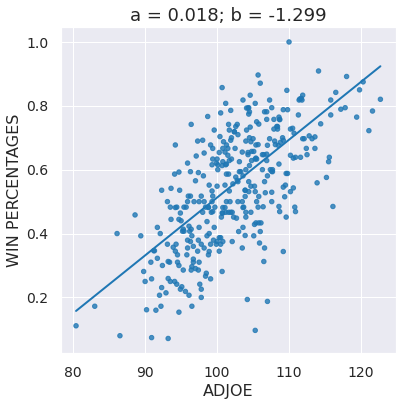

In [79]:
adjoe_22 = linear_regression(cbb_22_adjoe, "ADJOE", "WIN PERCENTAGES")
a_o = adjoe_22.item(0)
b_o = adjoe_22.item(1)
plot_scatter_with_line(cbb_22_adjoe, "ADJOE", "WIN PERCENTAGES", a_o , b_o)

In [80]:
r2_score(cbb_22_adjoe, "ADJOE", "WIN PERCENTAGES", a_o, b_o)

0.42203548726795637

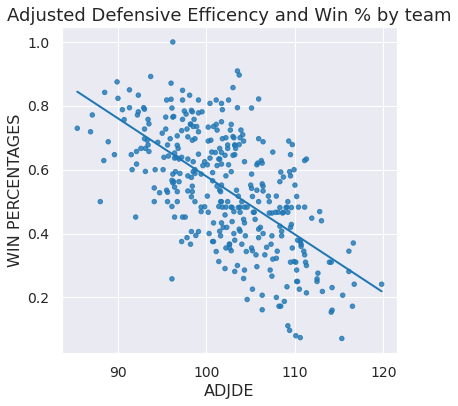

In [81]:
adjde_22 = linear_regression(cbb_22_adjde, "ADJDE", "WIN PERCENTAGES")
a_d = adjde_22.item(0)
b_d = adjde_22.item(1)
plot_scatter_with_line(cbb_22_adjde, "ADJDE", "WIN PERCENTAGES", a_d , b_d).set_title("Adjusted Defensive Efficency and Win % by team")

In [82]:
r2_score(cbb_22_adjde, "ADJDE", "WIN PERCENTAGES", a_d, b_d)

0.38793070210781244

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 8. * Additional work


Use the cells below to add any additional work that supports exploring your data or answering quantitative questions. 

**Mastery and creativity.** A truly masterful data science project will go above and beyond the minimum requirements and creatively incorporate the concepts we have learned and practiced in this class. Feel free to go beyond the scope of what we have learned in this class if you have completed all other requirements.

In [83]:
cbb_22.sort("COMBINED", descending=True)

TEAM,CONF,G,W,ADJOE,ADJDE,YEAR,ADJOE DIFF,ADJDE DIFF,COMBINED,WIN PERCENTAGES
Gonzaga,WCC,32,28,120.3,89.9,2022,17.1487,-13.2533,30.4,0.875
Kansas,B12,40,34,119.8,91.3,2022,16.6487,-11.8533,28.5,0.85
Houston,Amer,38,32,116.5,88.5,2022,13.3487,-14.6533,28,0.842105
Duke,ACC,39,32,122.7,96,2022,19.5487,-7.15325,26.7,0.820513
Baylor,B12,34,27,117.8,91.3,2022,14.6487,-11.8533,26.5,0.794118
Texas Tech,B12,37,27,110.5,85.4,2022,7.34868,-17.7533,25.1,0.72973
Arizona,P12,37,33,118,93.7,2022,14.8487,-9.45325,24.3,0.891892
Villanova,BE,38,30,117.2,93,2022,14.0487,-10.1533,24.2,0.789474
Tennessee,SEC,35,27,111.3,87.1,2022,8.14868,-16.0533,24.2,0.771429
Purdue,B10,37,29,121.6,97.5,2022,18.4487,-5.65325,24.1,0.783784


In [84]:
cbb_22.sort("WIN PERCENTAGES", descending=True)

TEAM,CONF,G,W,ADJOE,ADJDE,YEAR,ADJOE DIFF,ADJDE DIFF,COMBINED,WIN PERCENTAGES
Murray St.,OVC,31,31,110,96.2,2022,6.84868,-6.95325,13.8,1
South Dakota St.,Sum,33,30,114.1,103.5,2022,10.9487,0.34675,10.6,0.909091
Longwood,BSth,29,26,105.7,103.7,2022,2.54868,0.54675,2,0.896552
Arizona,P12,37,33,118,93.7,2022,14.8487,-9.45325,24.3,0.891892
Gonzaga,WCC,32,28,120.3,89.9,2022,17.1487,-13.2533,30.4,0.875
New Mexico St.,WAC,31,27,106,96,2022,2.84868,-7.15325,10,0.870968
Norfolk St.,MEAC,28,24,100.7,103,2022,-2.45132,-0.15325,-2.3,0.857143
Kansas,B12,40,34,119.8,91.3,2022,16.6487,-11.8533,28.5,0.85
Vermont,AE,33,28,109.7,97.3,2022,6.54868,-5.85325,12.4,0.848485
Houston,Amer,38,32,116.5,88.5,2022,13.3487,-14.6533,28,0.842105


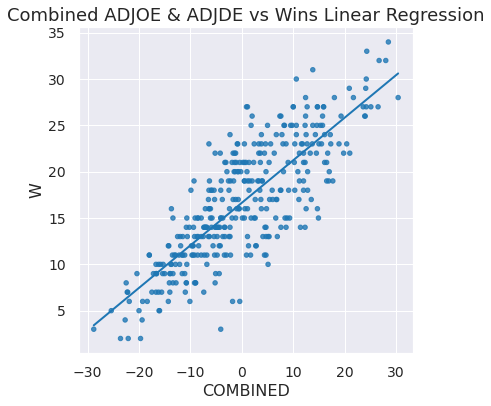

In [85]:
combined = linear_regression(cbb_22, "COMBINED", "W")
a = combined.item(0)
b = combined.item(1)
plot_scatter_with_line(cbb_22, "COMBINED", "W", a, b).set_title("Combined ADJOE & ADJDE vs Wins Linear Regression")

In [86]:
r2_score(cbb_22, "COMBINED", "W", a, b)

0.6617762236006124

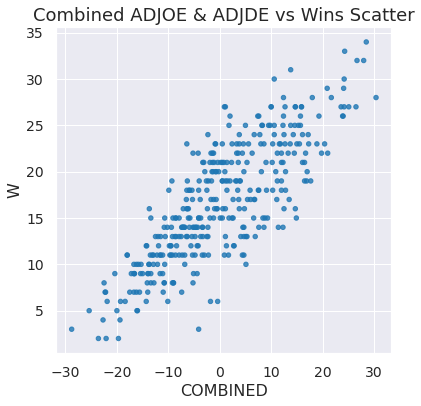

In [87]:
cbb_22.scatter("COMBINED", "W").set_title("Combined ADJOE & ADJDE vs Wins Scatter")

In [88]:
pearson_correlation(cbb_22, "COMBINED", "W")

0.813496295996861

<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 7. Ethics


Discuss (in full English sentences) at least one possible ethical consideration of using the dataset or doing analysis of the dataset (e.g., the potential harms of using the data from a Consequentialist or Deontologist perspective).

A possible ethical consideration in our chosen dataset relates to the publication of the team rankings and performance metrics. From a consequentialist perspective, the subjective nature of the team rankings raises concerns about the potential negative impacts associated with sharing this information, concerning the team, but more specifically the players and coaches. When fans, the media and analysts focus on the rankings, it can lead to criticism and increased pressure on the players and coaches, impacting them off the court and their performance on the court. There is not only an impact on the players and coaches, but also the audience watching the game. The overemphasis on rankings and statistics may take attention away from fans actually watching the games and really grasping a team’s true performance, which statistics and rankings don’t show. The factual nature of the statistics, unlike the rankings, makes this a focal point of this ethical consideration. From a consequentialist perspective, the dataset used can lead to unintended consequences, influencing the fan’s perception of the teams and impacting the well being of players and coaches. 


<hr style="margin-bottom: 0px; padding:0; border: 2px solid #500082;"/>


## 8. Conclusions


Describe (in full English sentences) what has been learned and address the original quantitative questions.

We began our project by answering our first quantitative question which asked which team had the highest win percentage in the year 2022 and what it was. In order to answer this question, we found the specific year using “where” and found the win percentage by dividing the win column by the games played column. We then added that column, win percentage to a new table, showing each team's win percentage in the year 2022. In order to find the best win percentage, we used the max function, which showed the teams with the highest win percentage in order. It revealed that Murray State had a win percentage of 100% that year. We then began to compare the correlation between offensive efficiency to win percentage and defensive efficiency to win percentage, to find which was more associated with win percentage. To find which had a greater correlation, we first created a linear regression for offensive and defensive efficiencies with win percentage. We then calculated the r^2 score for the two statistics. For offensive efficiency it came out to be 0.422 and for defensive efficiency, it came out to be 0.388. We also calculated the Pearson correlation coefficient of the two, with offensive efficiency being 0.657 and defensive efficiency was -0.623. We learned that there was a slightly higher correlation between offensive efficiency than defensive efficiency.

To answer the next question, we created a statistic called 'combined', which is adjusted offensive efficency - adjusted defensive efficiency. After adding it to our table, we looked at a linear regression using this combined statistic as the x variable and the win percentage as the y variable. Our r^2 value of .66 was higher than using just offense or defense individually, which is to be expected, as we understand that a team needs to play well on both sides of the ball in order to consistently win at a high rate. 

Along with answering these questions, we wanted to look at the wins, the offensive efficency, and defensive efficiency of each team per year in a line graph. We created interactive plots that showed this, revealing how each team performed over the years. It was interesting to see how teams are able to bounce back from down years or have a great year and fall off only a season later. We also found other relevant information such as the average adjusted offensive and defensive efficiency, which was 103.15 for both statistics. They are the same because the amount of points scored per possession and points allowed among all teams in basketball will end up being the same. Overall, by leveraging the knowledge acquired throughout the semester, we were able to analyze and enhance our understanding of a dataset. Through the analysis, we gained valuable insights into how offensive and defensive efficiency impact teams and conferences in division 1 basketball.


# You're Done!

**Important submission information:** Follow these steps to submit your work:
* Choose **Save Notebook** from the **File** menu.
* **Run the final cell** and click the link below to download the zip file. 

Once you have downloaded that file, go to [Gradescope](https://www.gradescope.com/) and submit the zip file to the corresponding assignment. The name of this assignment is "Final Project". **Be sure your work is saved before running the last cell!**

In [89]:
# Save your notebook first, then run this cell to export your submission.
import glob 
grader.export(pdf=False,files=glob.glob("*.csv") + glob.glob("*.ipynb") + glob.glob("*.py"))

Output()